In [6]:
# import libraries for data analysis
import numpy as np
import pandas as pd

# import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style(style = 'whitegrid', rc = {'xtick.bottom': True, 'ytick.left': True})

In [18]:
# read data from the dataset into dataframes
age_group_details = pd.read_csv('AgeGroupDetails.csv')
covid_19_india = pd.read_csv('covid_19_india.csv')
hospital_beds_india = pd.read_csv('HospitalBedsIndia.csv')
icmr_testing_labs = pd.read_csv('ICMRTestingLabs.csv')
individual_details = pd.read_csv('IndividualDetails.csv')
population_india_census_2011 = pd.read_csv('population_india_census2011.csv')
statewise_testing_details = pd.read_csv('StatewiseTestingDetails.csv')

# explore each of the dataframes (below)

In [22]:
 age_group_details.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


In [23]:
covid_19_india.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [24]:
hospital_beds_india.head()


,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


In [25]:
icmr_testing_labs.head()


,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory


In [26]:
individual_details.head()


,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [27]:
population_india_census_2011.head()


,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [28]:
# update the state name for Telangana
population_india_census_2011['State / Union Territory'] = population_india_census_2011['State / Union Territory'].apply(lambda name : 'Telangana' if name == 'Telengana' else name)

# update the district name for Ahmedabad
individual_details['detected_district'] = individual_details['detected_district'].apply(lambda name : 'Ahmedabad' if name == 'Ahmadabad' else name)

# udpate the city name for Ahmedabad
individual_details['detected_city'] = individual_details['detected_city'].apply(lambda name : 'Ahmedabad' if name == 'Ahmadabad' else name)

Data analysis and visualization



1 Cumulative number of cases (categorised by current health status) grouped by date


1.1 Creating a dataframe with number of cases (categorised by current health status) grouped by date [CUMULATIVE]

In [29]:
date_cumulative = covid_19_india.groupby('Date').sum()
date_cumulative.reset_index(inplace = True)

# change the date format to 'YYYY-MM-DD'
date_cumulative['Date'] = date_cumulative['Date'].apply(lambda date : '20' + '-'.join(date.split('/')[::-1]))

# sort the rows by date (in ascending order)
date_cumulative.sort_values('Date', inplace = True)

# calculate the number of active cases
date_cumulative['Active'] = date_cumulative['Confirmed'] - (date_cumulative['Cured'] + date_cumulative['Deaths'])

date_cumulative = date_cumulative[['Date', 'Confirmed', 'Cured', 'Deaths', 'Active']]

# dataframe with number of cases (categorised by current health status) grouped by date [CUMULATIVE]
date_cumulative.head()

,Date,Confirmed,Cured,Deaths,Active
116,2020-01-30,1,0,0,1
119,2020-01-31,1,0,0,1
0,2020-02-01,2,0,0,2
4,2020-02-02,3,0,0,3
8,2020-02-03,3,0,0,3


1.2 PLOT

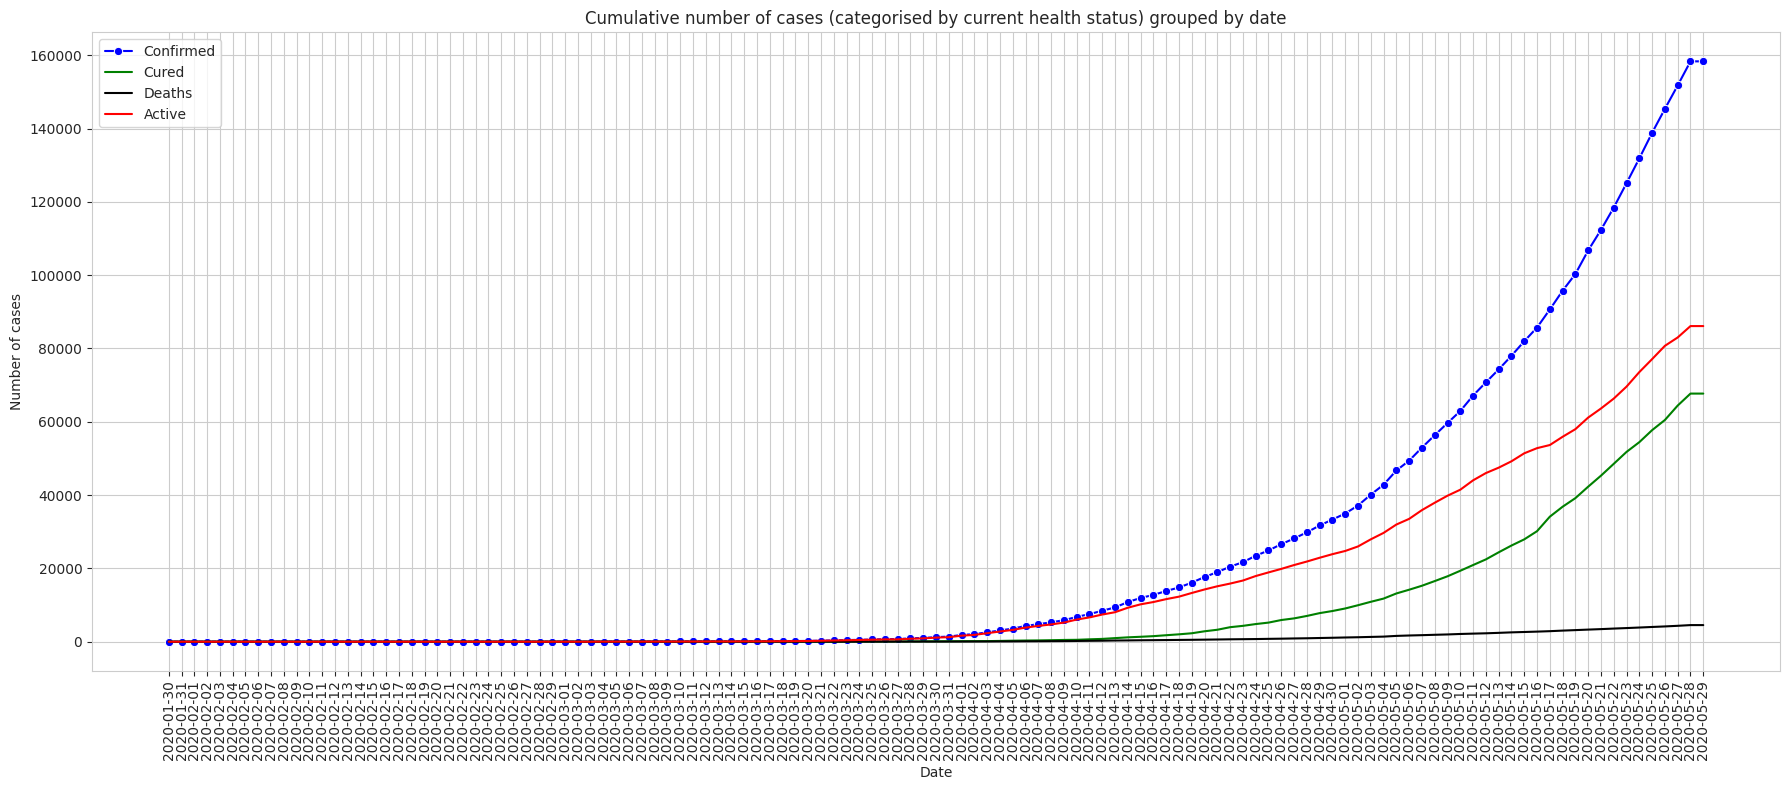

In [30]:
plt.figure(figsize=(18, 8), dpi = 100)
sns.lineplot(x = 'Date', y = 'Confirmed', data = date_cumulative, label = 'Confirmed', color = 'blue', marker = 'o')
sns.lineplot(x = 'Date', y = 'Cured', data = date_cumulative, label = 'Cured', color = 'green')
sns.lineplot(x = 'Date', y = 'Deaths', data = date_cumulative, label = 'Deaths', color = 'black') 
sns.lineplot(x = 'Date', y = 'Active', data = date_cumulative, label = 'Active', color = 'red')
plt.title('Cumulative number of cases (categorised by current health status) grouped by date')
plt.ylabel('Number of cases')
plt.legend(loc = 0)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

2 Total positive cases in each age group



2.1 Plot

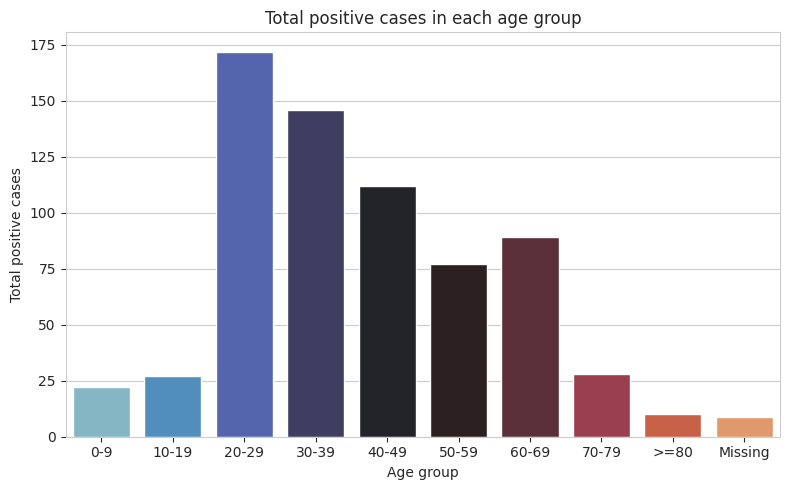

In [31]:
plt.figure(figsize=(8, 5), dpi = 100)
sns.barplot(x = 'AgeGroup', y = 'TotalCases', data = age_group_details, palette = 'icefire')
plt.title('Total positive cases in each age group')
plt.xlabel('Age group')
plt.ylabel('Total positive cases')
plt.tight_layout()
plt.show()

3 Total cases in India and each of its states and union territories


3.1 Creating a dataframe with important data from each state/union territory as well as India


In [32]:

temp_state = covid_19_india.groupby('State/UnionTerritory').max()
temp_state.reset_index(inplace = True)
temp_state['Active'] = temp_state['Confirmed'] - (temp_state['Cured'] + temp_state['Deaths'])
temp_state = temp_state[['State/UnionTerritory', 'Confirmed', 'Cured', 'Deaths', 'Active']]
temp_state.rename(columns = {'State/UnionTerritory': 'State / Union Territory'}, inplace = True)
temp_state['State / Union Territory'] = temp_state['State / Union Territory'].apply(lambda name : 'Telangana' if name == 'Telengana' else name)

# calculate the number of cases (categorised by current health status) for India and add them to the dataframe
# index number 41 is chosen to avoid any loss of data (as of now, the total number of states and UTs in India is 28 + 8 = 36)
temp_state.loc[41] = ['India', temp_state['Confirmed'].sum(), temp_state['Cured'].sum(), temp_state['Deaths'].sum(), temp_state['Active'].sum()]
 
temp_state.head()

,State / Union Territory,Confirmed,Cured,Deaths,Active
0,Andaman and Nicobar Islands,33,33,0,0
1,Andhra Pradesh,3171,2057,58,1056
2,Arunachal Pradesh,2,1,0,1
3,Assam,781,87,4,690
4,Bihar,3061,1083,15,1963


In [33]:
# calculate India's total area
total_area_india_km2 = population_india_census_2011['Area'].apply(lambda area : float(area.split('\xa0')[0].replace(',', ''))).sum()

temp_population = population_india_census_2011[['State / Union Territory', 'Population', 'Density']]
temp_population['Density (per km2)'] = temp_population['Density'].apply(lambda density : float(density.split('/')[0].replace(',', '')))
temp_population.drop(columns = ['Density'], inplace = True)

# calculate India's total population
total_population_india = temp_population['Population'].sum()

# calculate India's total population density
density_india = total_population_india / total_area_india_km2

temp_population.loc[41] = ['India', total_population_india, density_india]
temp_population.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(

,State / Union Territory,Population,Density (per km2)
0,Uttar Pradesh,199812341,828.0
1,Maharashtra,112374333,365.0
2,Bihar,104099452,1102.0
3,West Bengal,91276115,1029.0
4,Madhya Pradesh,72626809,236.0


In [34]:
statewise_data = pd.merge(left = temp_state, right = temp_population, on = 'State / Union Territory', how = 'inner')

# selecting India's data from the merged dataframe and storing it as a series in a variable
india_data = statewise_data.iloc[-1]

# dropping India's data stored in the last row of the dataframe
statewise_data.drop(statewise_data.tail(1).index, inplace = True)

# storing India's data in a row with index number 41 in the dataframe
statewise_data.loc[41] = india_data

# dataframe with important data from each state/union territory as well as India
statewise_data.head()

,State / Union Territory,Confirmed,Cured,Deaths,Active,Population,Density (per km2)
0,Andaman and Nicobar Islands,33,33,0,0,380581,46.0
1,Andhra Pradesh,3171,2057,58,1056,49577103,303.0
2,Arunachal Pradesh,2,1,0,1,1383727,17.0
3,Assam,781,87,4,690,31205576,397.0
4,Bihar,3061,1083,15,1963,104099452,1102.0


3.2 Plot

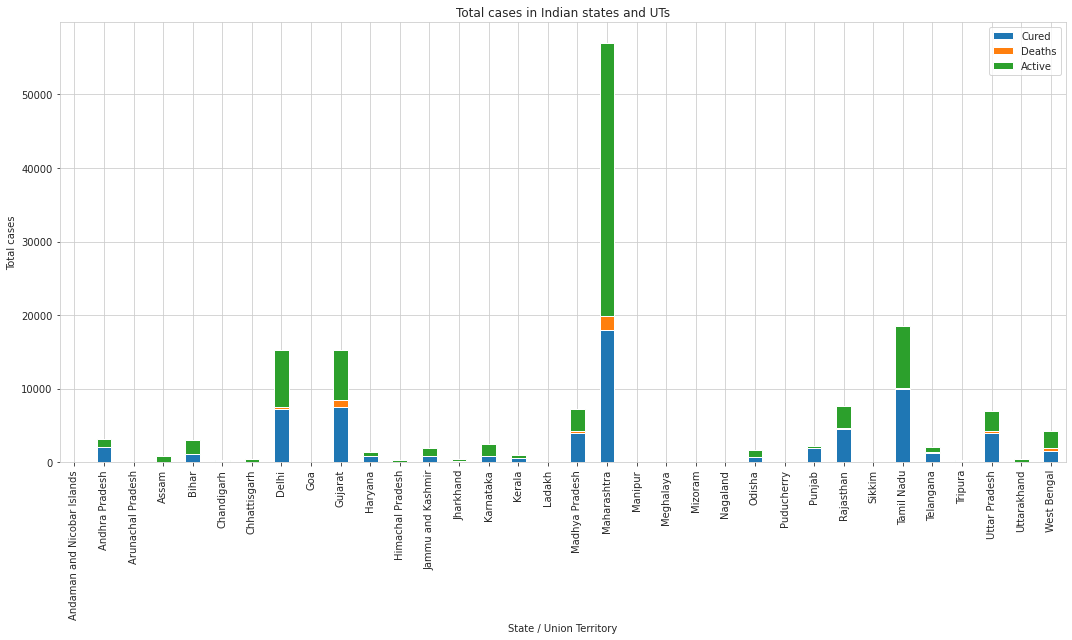

In [35]:
statewise_data.drop(41)[['State / Union Territory', 'Cured', 'Deaths', 'Active']].plot.bar(x = 'State / Union Territory', stacked = True, figsize = (15, 9))
plt.title('Total cases in Indian states and UTs')
plt.ylabel('Total cases')
plt.tight_layout()
plt.show()

3.3 Number of cases in India


In [36]:

total_cases_national = statewise_data.loc[41]['Confirmed']
active_national = statewise_data.loc[41]['Active']
cured_national = statewise_data.loc[41]['Cured']
deaths_national = statewise_data.loc[41]['Deaths']
print('NUMBER OF CASES IN INDIA\n')
print(f'Total: {total_cases_national}')
print(f'Active: {active_national}')
print(f'Cured: {cured_national}')
print(f'Deaths: {deaths_national}')

NUMBER OF CASES IN INDIA

Total: 158410
Active: 86186
Cured: 67692
Deaths: 4532


4 Non-cumulative number of cases (categorised by current health status) grouped by date


4.1 Creating a dataframe with number of cases (categorised by current health status) grouped by date [NON-CUMULATIVE]


In [37]:

datewise_count = individual_details[individual_details['current_status'] != 'Migrated']
datewise_count = datewise_count.groupby(['diagnosed_date', 'current_status']).count()['id'].unstack()
datewise_count.fillna(0, inplace = True)
datewise_count.reset_index(inplace = True)

# change the date format to 'YYYY-MM-DD'
datewise_count['diagnosed_date'] = datewise_count['diagnosed_date'].apply(lambda date : '-'.join(date.split('/')[::-1]))

datewise_count.sort_values('diagnosed_date', inplace = True)
datewise_count.rename(columns = {'Deceased': 'Deaths', 'Hospitalized': 'Active', 'Recovered': 'Cured'}, inplace = True)

# calculate the total number of confirmed cases
datewise_count['Confirmed'] = datewise_count['Active'] + datewise_count['Cured'] + datewise_count['Deaths']

datewise_count['Deaths'] = datewise_count['Deaths'].apply(lambda num : int(num))
datewise_count['Active'] = datewise_count['Active'].apply(lambda num : int(num))
datewise_count['Cured'] = datewise_count['Cured'].apply(lambda num : int(num))
datewise_count['Confirmed'] = datewise_count['Confirmed'].apply(lambda num : int(num))
datewise_count = datewise_count[['diagnosed_date', 'Confirmed', 'Deaths', 'Cured', 'Active']]

# dataframe with number of cases (categorised by current health status) grouped by date [NON-CUMULATIVE]
datewise_count.head()

current_status,diagnosed_date,Confirmed,Deaths,Cured,Active
56,2020-01-30,1,0,1,0
1,2020-02-02,1,0,1,0
4,2020-02-03,1,0,1,0
2,2020-03-02,2,0,2,0
5,2020-03-03,1,0,1,0


4.2 Plot

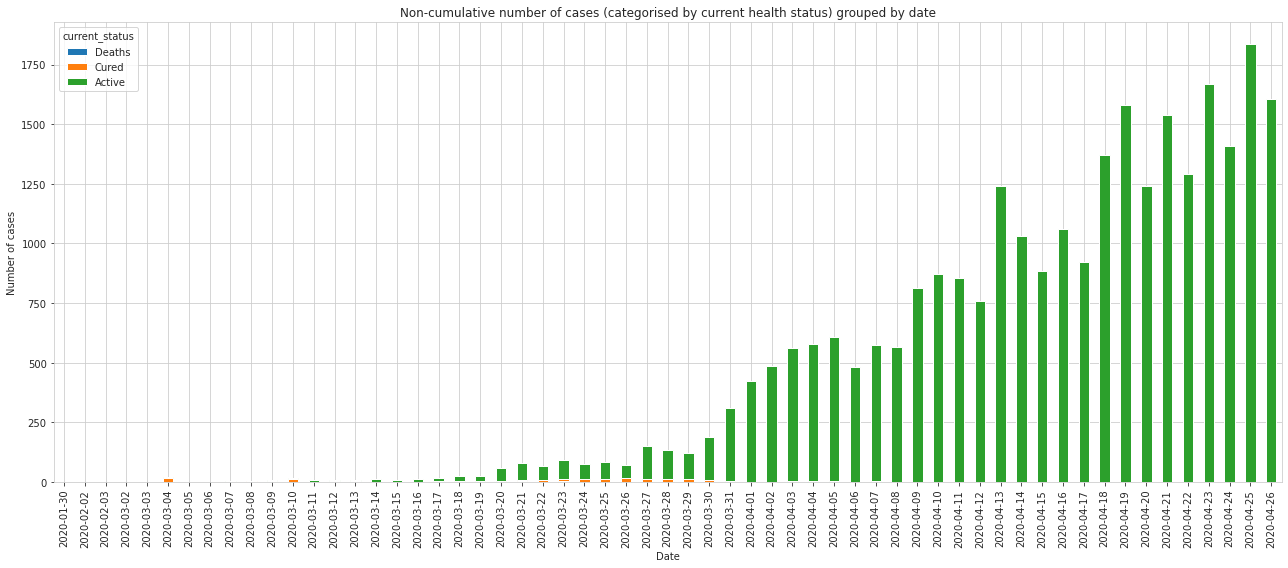

In [38]:

datewise_count.drop(columns = ['Confirmed']).plot.bar(x = 'diagnosed_date', stacked = True, figsize = (18, 8))
plt.title('Non-cumulative number of cases (categorised by current health status) grouped by date')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.tight_layout()
plt.show()

5 Total cases per million people in India and each of its states and union territories


5.1 Calculation from available data

In [39]:

# calculate total cases per million people for each state/union territory and India
statewise_data['Total cases per million people'] = statewise_data['Confirmed'] / statewise_data['Population'] * pow(10, 6)
statewise_data.head()

,State / Union Territory,Confirmed,Cured,Deaths,Active,Population,Density (per km2),Total cases per million people
0,Andaman and Nicobar Islands,33,33,0,0,380581,46.0,86.709531
1,Andhra Pradesh,3171,2057,58,1056,49577103,303.0,63.960978
2,Arunachal Pradesh,2,1,0,1,1383727,17.0,1.445372
3,Assam,781,87,4,690,31205576,397.0,25.027578
4,Bihar,3061,1083,15,1963,104099452,1102.0,29.404574


5.2 Plot

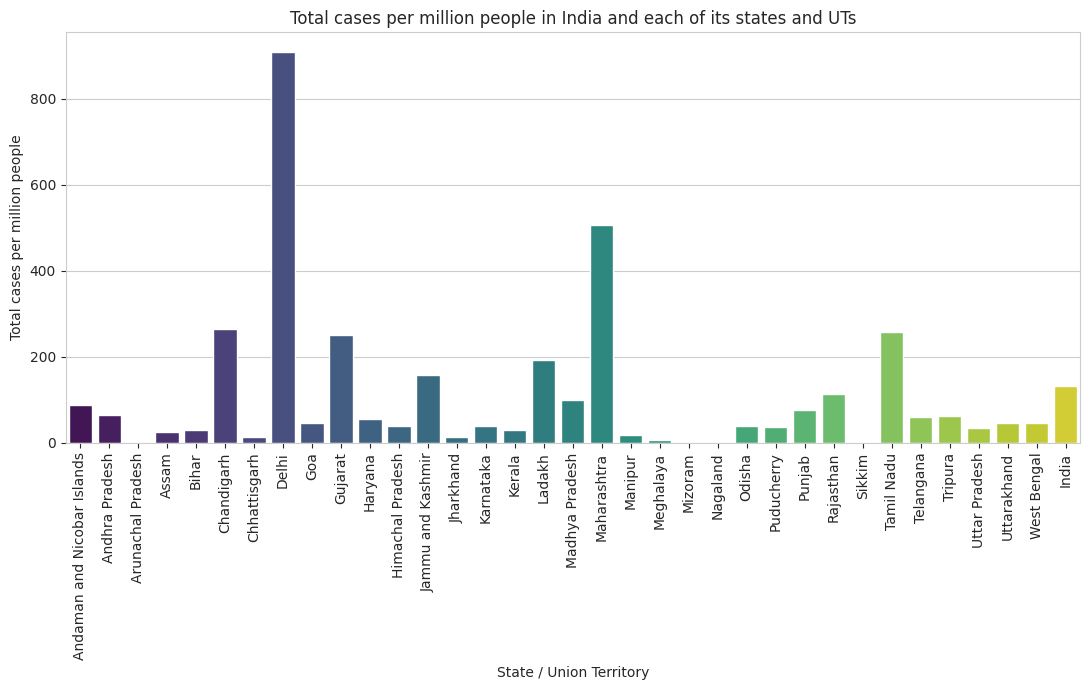

In [40]:

plt.figure(figsize=(11, 7), dpi = 100)
sns.barplot(x = 'State / Union Territory', y = 'Total cases per million people', data = statewise_data, palette = 'viridis')
plt.title('Total cases per million people in India and each of its states and UTs')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

6 Age distribution of positive cases in India and each of its states and union territories

6.1 Data cleaning




In [41]:

# create a list of the Indian states where positive COVID-19 cases have been reported
list_of_states = list(individual_details['detected_state'].unique())

# create a list of nationalities of all the positive COVID-19 cases reported in India
list_of_nations = list(individual_details[individual_details['nationality'].isnull() == False]['nationality'].unique())

temp_age = individual_details[['age', 'detected_state', 'nationality', 'current_status']]
for i in temp_age.index:
    if temp_age.loc[i]['detected_state'] in list_of_states and temp_age.loc[i]['nationality'] not in list_of_nations:
        # assign nationality as 'India', if detected state is in the list of Indian states but nationality is not in the list of reported nationalities
        temp_age.loc[i]['nationality'] = 'India'
        
# select only those cases whose nationality is mentioned as 'India'
temp_age = temp_age[temp_age['nationality'] == 'India']

# drop the rows where age is not mentioned
temp_age.dropna(subset = ['age'], inplace = True)

# if age is mentioned as '28-35', update it with the mean value, i.e. 32 (the actual mean value is 31.5, but since we want to assign a value for age, we use 32)
temp_age['age'] = temp_age['age'].apply(lambda age : int(float(32)) if age == '28-35' else int(float(age)))

temp_age.head()

,age,detected_state,nationality,current_status
0,20,Kerala,India,Recovered
3,45,Delhi,India,Recovered
4,24,Telangana,India,Recovered
23,45,Uttar Pradesh,India,Recovered
25,16,Uttar Pradesh,India,Recovered


6.2 Plot (States and union territories)

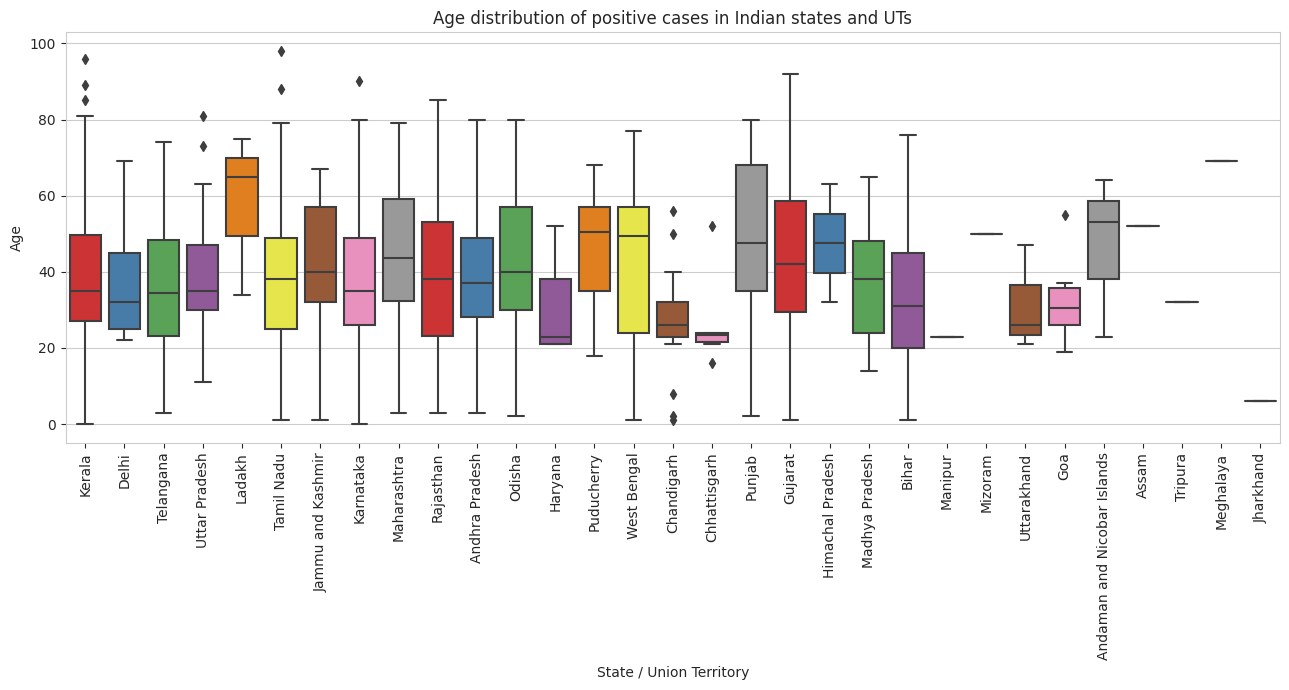

In [43]:

plt.figure(figsize=(13, 7), dpi = 100)
sns.boxplot(x = 'detected_state', y = 'age', data = temp_age, palette = 'Set1')
plt.title('Age distribution of positive cases in Indian states and UTs')
plt.xlabel('State / Union Territory')
plt.ylabel('Age')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

6.3 Plot (India)


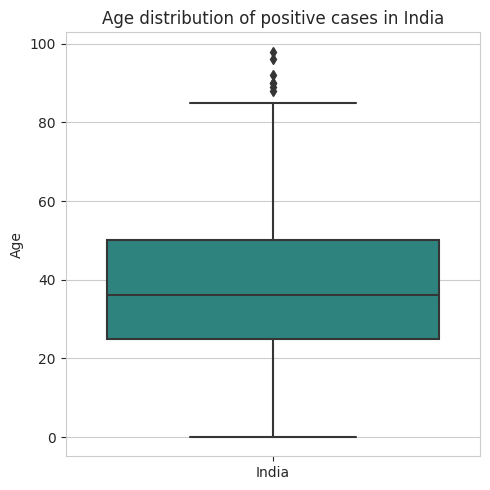

In [44]:

plt.figure(figsize=(5, 5), dpi = 100)
sns.boxplot(x = 'nationality', y = 'age', data = temp_age, palette = 'viridis')
plt.title('Age distribution of positive cases in India')
plt.xlabel('')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

7 National descriptive statistics (Age)


7.1 Ages of all positive cases in India


In [45]:

print('NATIONAL DESCRIPTIVE STATISTICS (Ages of all positive cases in India)\n')
print(temp_age.describe()['age'])

NATIONAL DESCRIPTIVE STATISTICS (Ages of all positive cases in India)

count    2318.000000
mean       38.284297
std        17.223425
min         0.000000
25%        25.000000
50%        36.000000
75%        50.000000
max        98.000000
Name: age, dtype: float64


7.2 Ages of positive cases in India (grouped by current health status)

In [46]:

print('NATIONAL DESCRIPTIVE STATISTICS (Ages of positive cases in India, grouped by current health status)\n')
print(temp_age.groupby('current_status').describe()['age'])

NATIONAL DESCRIPTIVE STATISTICS (Ages of positive cases in India, grouped by current health status)

                 count       mean        std  min   25%   50%    75%   max
current_status                                                            
Deceased          43.0  59.860465  16.359912  1.0  50.0  65.0  70.00  85.0
Hospitalized    2165.0  37.836952  16.906608  0.0  25.0  36.0  50.00  98.0
Recovered        110.0  38.654545  18.443783  1.0  24.0  35.0  50.25  96.0


8 Correlation between population (or, population density) and total positive cases

8.1 Heat map


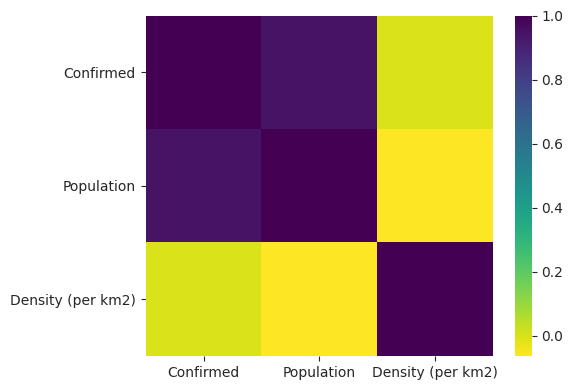

In [47]:

plt.figure(figsize=(6, 4), dpi = 100)
sns.heatmap(statewise_data.drop(columns = ['Cured', 'Deaths', 'Active', 'Total cases per million people']).corr(), cmap = 'viridis_r')
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

8.2 Simple linear regression (independent variable: Population, dependent variable: Total positive cases)


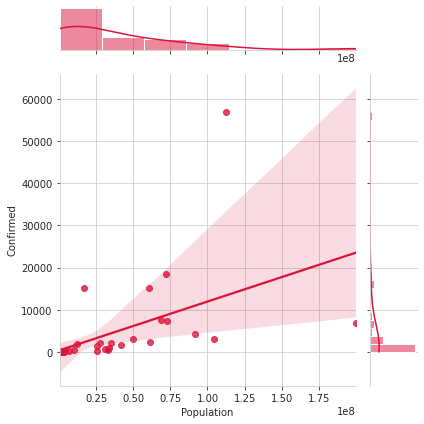

In [48]:

sns.jointplot(x = 'Population', y = 'Confirmed', data = statewise_data.drop(41), kind = 'reg', color = 'crimson')
plt.ylabel('Total positive cases')
plt.tight_layout()
plt.show()

8.3 Simple linear regression (independent variable: Density per km2, dependent variable: Total positive cases)

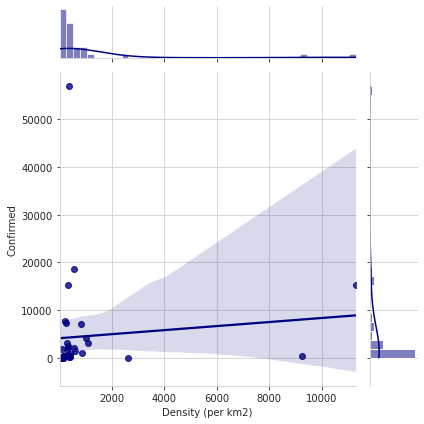

In [49]:

sns.jointplot(x = 'Density (per km2)', y = 'Confirmed', data = statewise_data.drop(41), kind = 'reg', color = 'navy')
plt.ylabel('Total positive cases')
plt.tight_layout()
plt.show()

9 Public health facilities in India and each of its states and union territories


9.1 Creating a dataframe with public health facility details for each state/UT and India

In [50]:
hospital_details = hospital_beds_india[['State/UT', 'TotalPublicHealthFacilities_HMIS', 'NumPublicBeds_HMIS']]
hospital_details.rename(columns = {'State/UT': 'State / Union Territory'}, inplace = True)
hospital_details['State / Union Territory'] = hospital_details['State / Union Territory'].apply(lambda name : str(name).replace('&', 'and'))
hospital_details.dropna(inplace = True)
hospital_details['TotalPublicHealthFacilities_HMIS'] = hospital_details['TotalPublicHealthFacilities_HMIS'].apply(lambda count : int(str(count).replace(',', '')))
hospital_details['NumPublicBeds_HMIS'] = hospital_details['NumPublicBeds_HMIS'].apply(lambda count : int(str(count).replace(',', '')))

# merge (or, add) the details for Dadra and Nagar Haveli & Daman and Diu (as the former UTs have been merged into a single UT) and update the dataframe
dnhdd = hospital_details[(hospital_details['State / Union Territory'] == 'Dadra and Nagar Haveli') | (hospital_details['State / Union Territory'] == 'Daman and Diu')].sum()
hospital_details.drop(index = [7, 8, 36], inplace = True)
hospital_details.loc[36] = ['Dadra and Nagar Haveli and Daman and Diu', dnhdd['TotalPublicHealthFacilities_HMIS'], dnhdd['NumPublicBeds_HMIS']]

hospital_details.sort_values('State / Union Territory', inplace = True)
hospital_details.loc[37] = ['India', hospital_details['TotalPublicHealthFacilities_HMIS'].sum(), hospital_details['NumPublicBeds_HMIS'].sum()]
hospital_details = pd.merge(left = hospital_details, right = temp_population.drop(columns = ['Density (per km2)']), on = 'State / Union Territory', how = 'inner')

# calculate public health facility details per 1000 people for each state/UT as well as India
hospital_details['TotalPublicHealthFacilities/1000 people'] = (hospital_details['TotalPublicHealthFacilities_HMIS'] / hospital_details['Population']) * 1000
hospital_details['NumPublicBeds/1000 people'] = (hospital_details['NumPublicBeds_HMIS'] / hospital_details['Population']) * 1000

# dataframe with public health facility details for each state/UT and India
hospital_details.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,State / Union Territory,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,Population,TotalPublicHealthFacilities/1000 people,NumPublicBeds/1000 people
0,Andaman and Nicobar Islands,34,1246,380581,0.089337,3.273942
1,Andhra Pradesh,1666,60799,49577103,0.033604,1.226352
2,Arunachal Pradesh,199,2320,1383727,0.143814,1.676631
3,Assam,1220,19115,31205576,0.039096,0.612551
4,Bihar,2146,17796,104099452,0.020615,0.170952


9.2 Population of each state/UT (Plot)


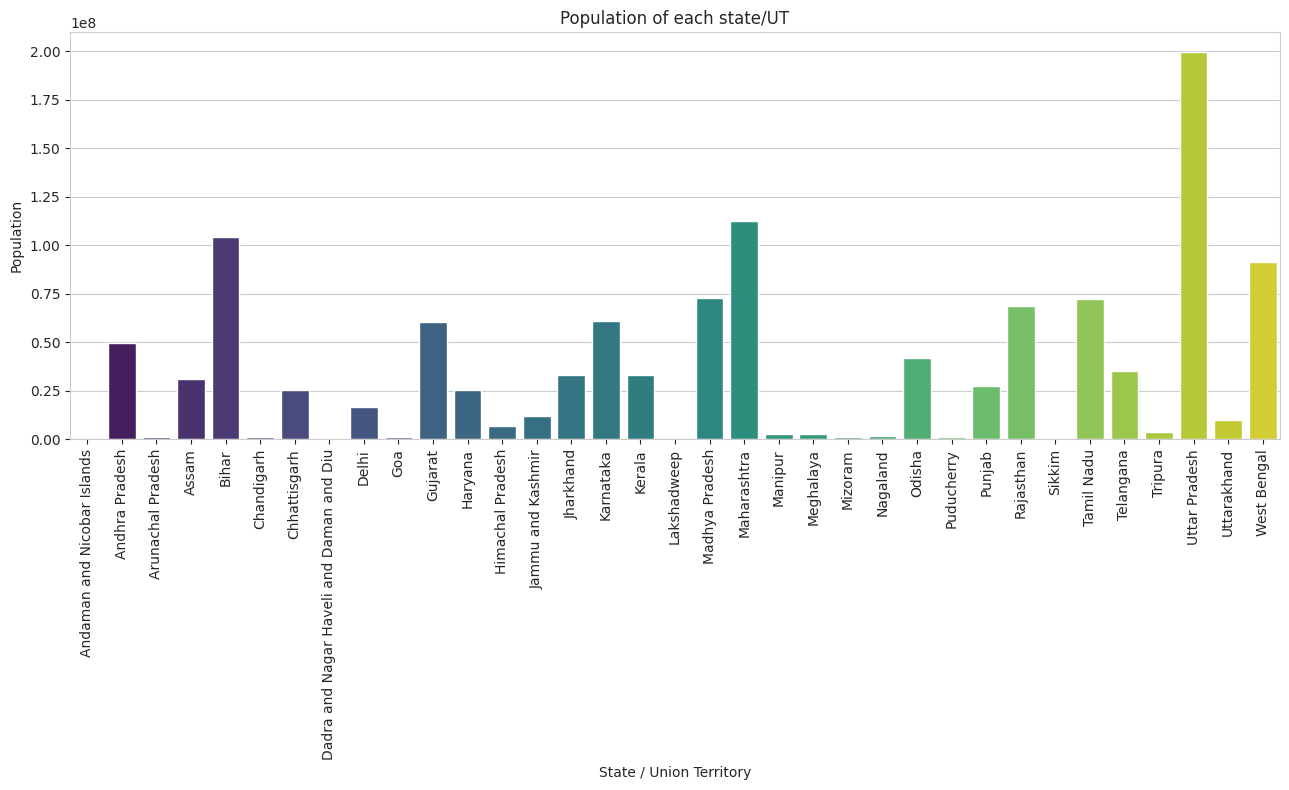

In [51]:

plt.figure(figsize=(13, 8), dpi = 100)
sns.barplot(x = 'State / Union Territory', y = 'Population', data = hospital_details.drop(35), palette = 'viridis')
plt.title('Population of each state/UT')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

9.3 Total public health facilities in each state/UT (Plot)


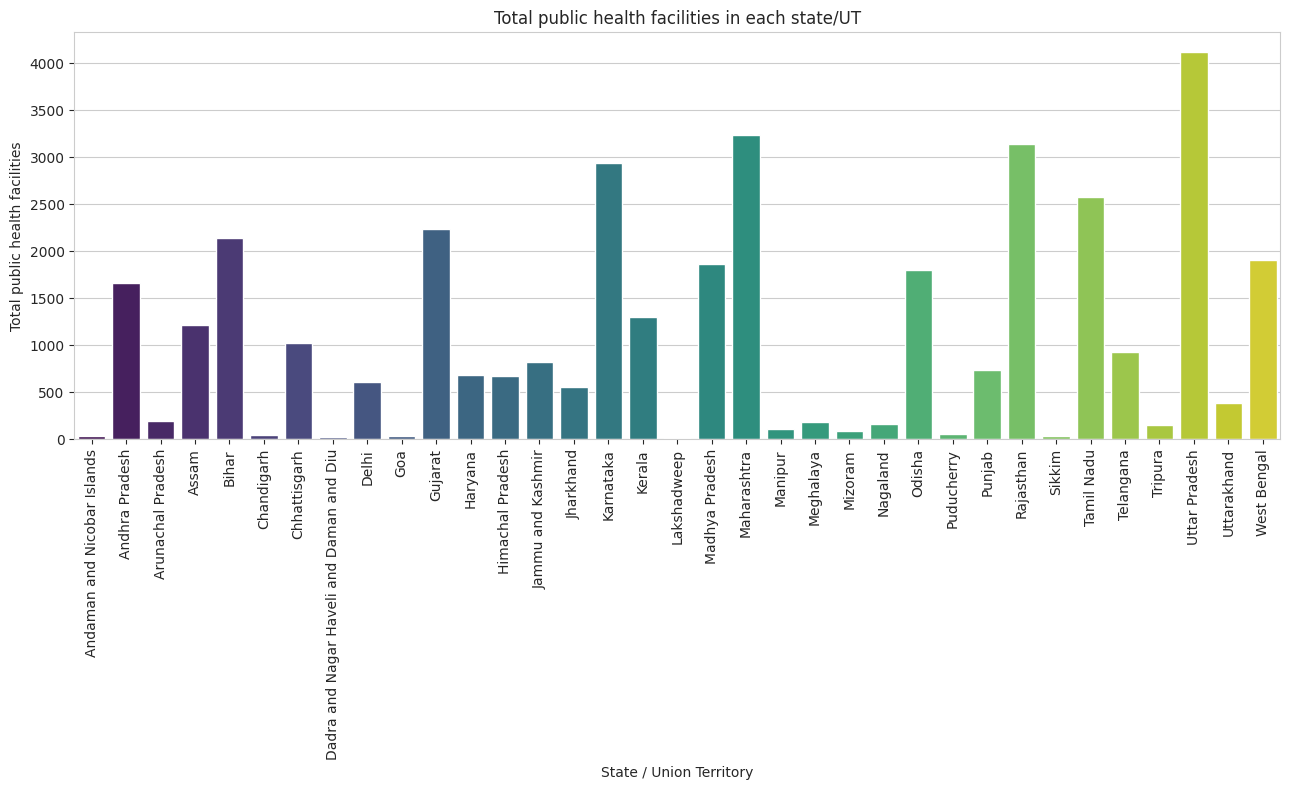

In [53]:

plt.figure(figsize=(13, 8), dpi = 100)
sns.barplot(x = 'State / Union Territory', y = 'TotalPublicHealthFacilities_HMIS', data = hospital_details.drop(35), palette = 'viridis')
plt.title('Total public health facilities in each state/UT')
plt.ylabel('Total public health facilities')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

9.4 Number of public beds in each state/UT (Plot)


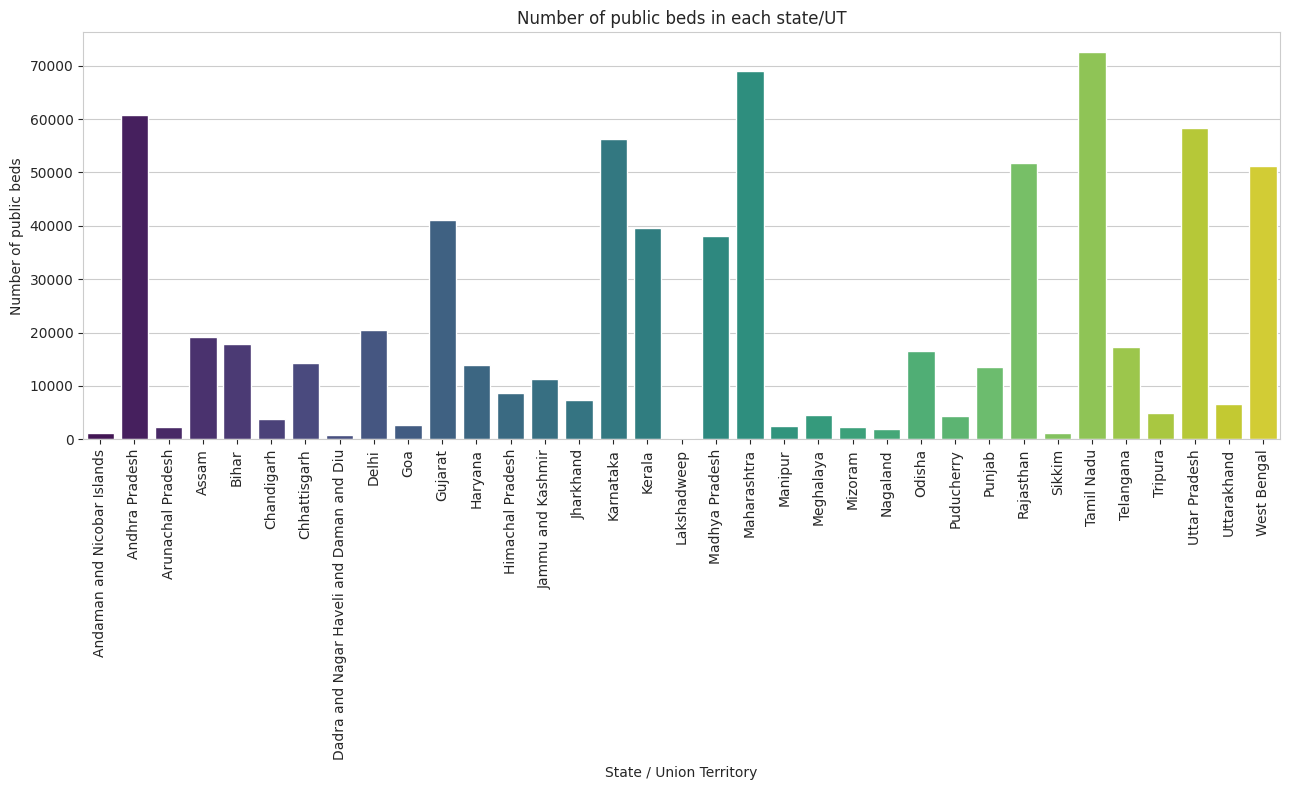

In [54]:

plt.figure(figsize=(13, 8), dpi = 100)
sns.barplot(x = 'State / Union Territory', y = 'NumPublicBeds_HMIS', data = hospital_details.drop(35), palette = 'viridis')
plt.title('Number of public beds in each state/UT')
plt.ylabel('Number of public beds')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

9.5 Total public health facilities per 1000 people in each state/UT and India (Plot)

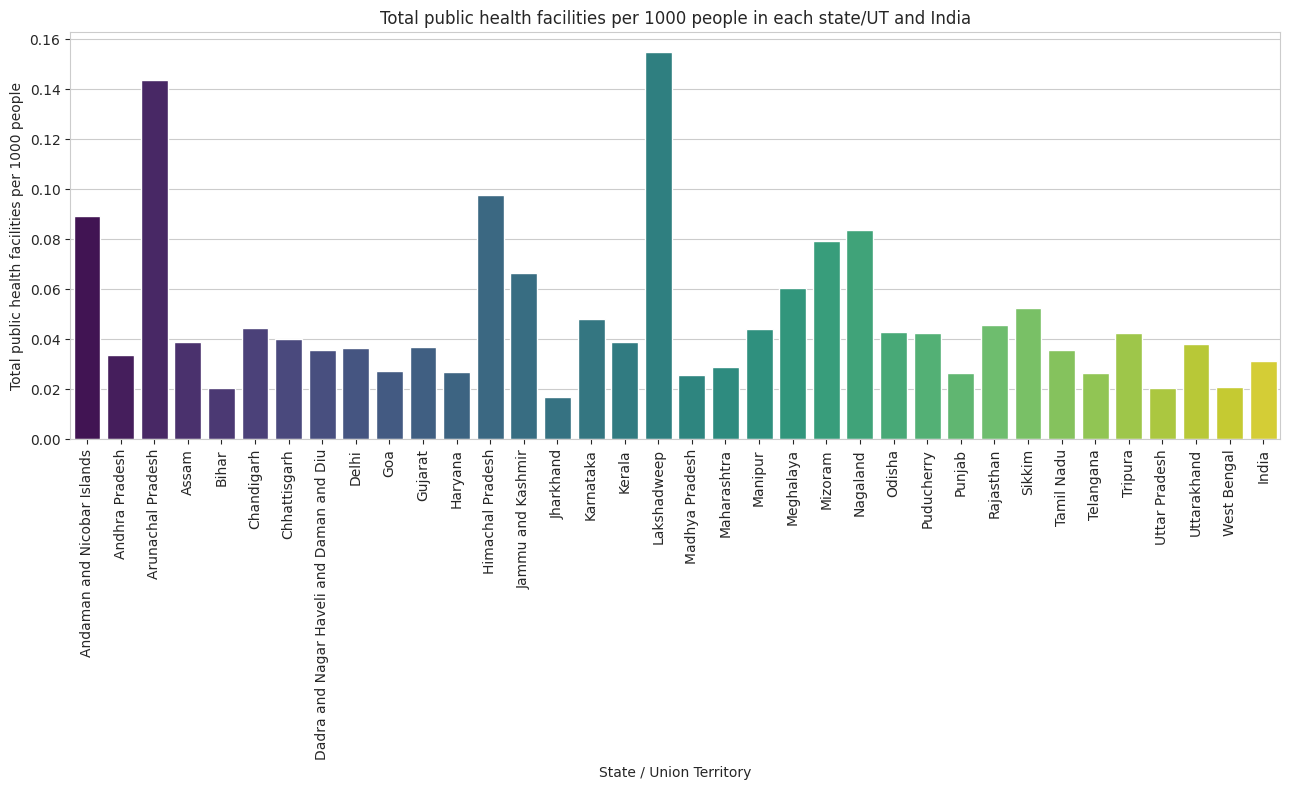

In [55]:

plt.figure(figsize=(13, 8), dpi = 100)
sns.barplot(x = 'State / Union Territory', y = 'TotalPublicHealthFacilities/1000 people', data = hospital_details, palette = 'viridis')
plt.title('Total public health facilities per 1000 people in each state/UT and India')
plt.ylabel('Total public health facilities per 1000 people')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

9.6 Number of public beds per 1000 people in each state/UT and India (Plot)


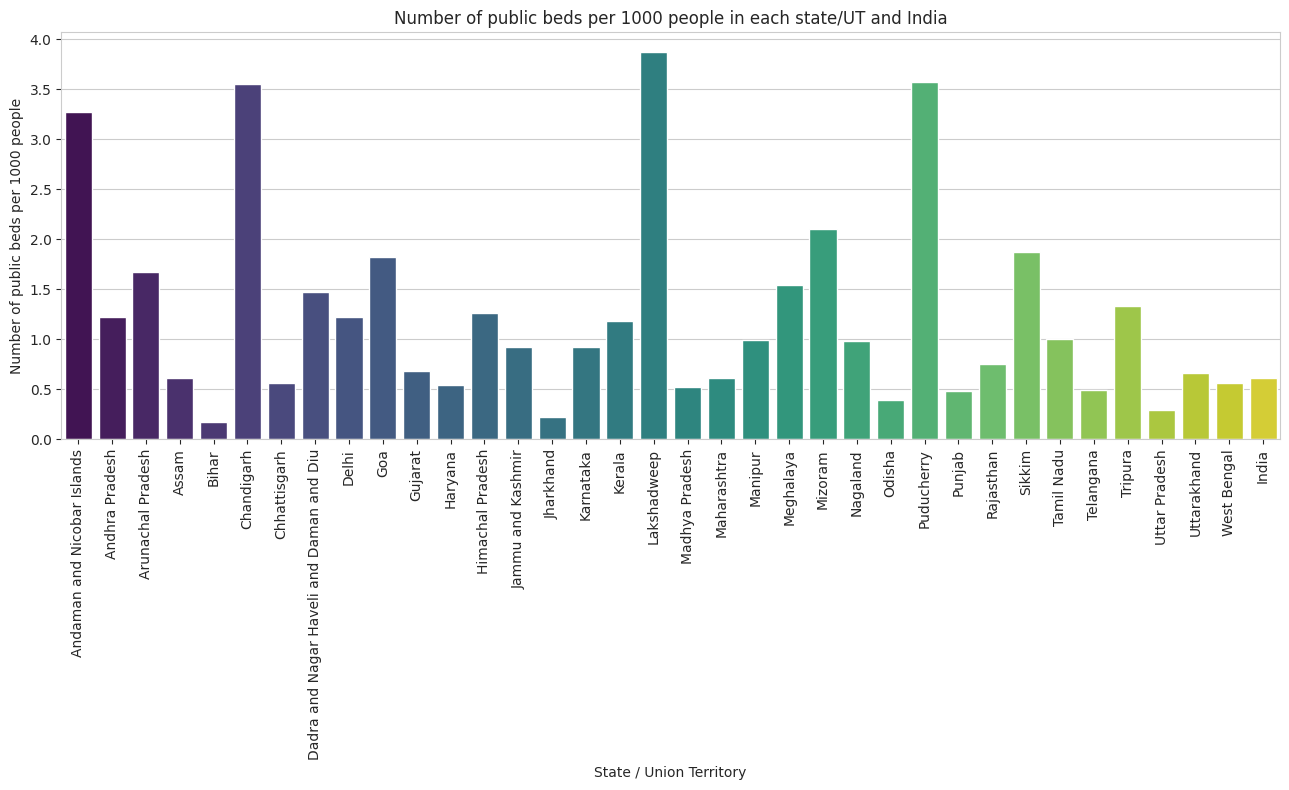

In [56]:

plt.figure(figsize=(13, 8), dpi = 100)
sns.barplot(x = 'State / Union Territory', y = 'NumPublicBeds/1000 people', data = hospital_details, palette = 'viridis')
plt.title('Number of public beds per 1000 people in each state/UT and India')
plt.ylabel('Number of public beds per 1000 people')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

9.7 Correlation heat map


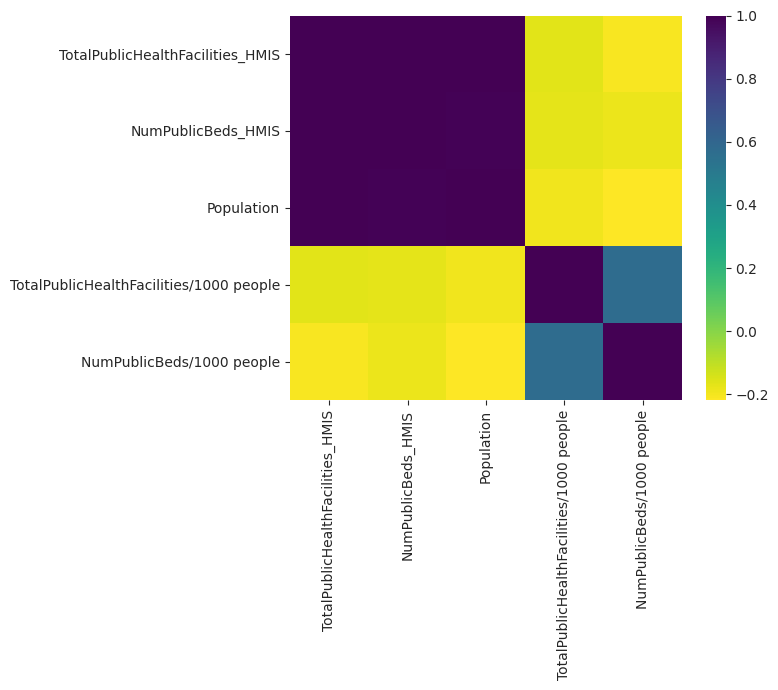

In [57]:

plt.figure(figsize=(8, 7), dpi = 100)
sns.heatmap(hospital_details.corr(), cmap = 'viridis_r')
plt.tight_layout()
plt.show()

10 Indian Council of Medical Research (ICMR) testing details


10.1 Data cleaning


In [58]:

testing_details = statewise_testing_details[['TotalSamples', 'Positive']]

# change the date format to 'YYYY-MM-DD'
testing_details['Date'] = statewise_testing_details['Date'].apply(lambda dt : '20' + '-'.join(dt.split(' ')[0].split('/')[::-1]))

testing_details = testing_details[['Date', 'TotalSamples', 'Positive']]

# dataframe with date-wise testing details provided by the Indian Council of Medical Research (ICMR)
testing_details.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Date,TotalSamples,Positive
0,202020-04-17,1403.0,12.0
1,202020-04-24,2679.0,27.0
2,202020-04-27,2848.0,33.0
3,202020-05-01,3754.0,33.0
4,202020-05-16,6677.0,33.0


10.2 Total samples tested and total positive cases reported on each date (Plot)


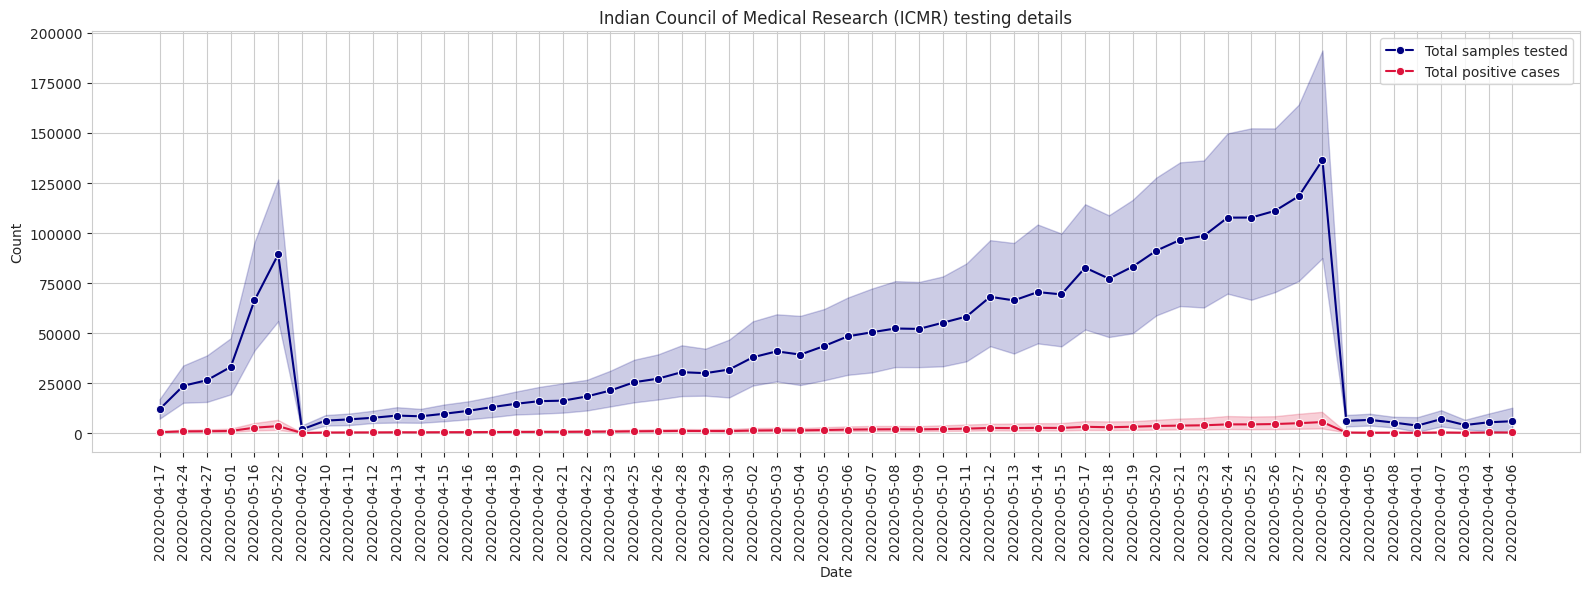

In [59]:

plt.figure(figsize=(16, 6), dpi = 100)
sns.lineplot(x = 'Date', y = 'TotalSamples', data = testing_details, label = 'Total samples tested', color = 'navy', marker = 'o') 
sns.lineplot(x = 'Date', y = 'Positive', data = testing_details, label = 'Total positive cases', color = 'crimson', marker = 'o')
plt.title('Indian Council of Medical Research (ICMR) testing details')
plt.ylabel('Count')
plt.legend(loc = 0)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

10.3 Simple linear regression (independent variable: Total samples tested, dependent variable: Total positive cases)


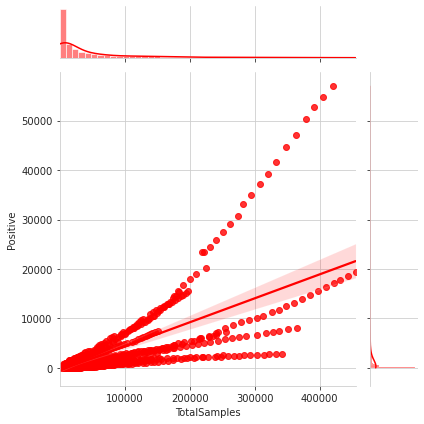

In [60]:

sns.jointplot(x = 'TotalSamples', y = 'Positive', data = testing_details, kind = 'reg', color = 'r')
plt.xlabel('Total samples tested')
plt.ylabel('Total positive cases')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


11 States/Union territories and districts with the highest and the lowest number of confirmed COVID-19 cases


11.1 Data cleaning and creation of appropriate series

In [62]:

# series: states/UTs (highest number of confirmed COVID-19 cases)
states_highest = individual_details['detected_state'].value_counts().head(10)

# series: states/UTs (lowest number of confirmed COVID-19 cases)
states_lowest = individual_details['detected_state'].value_counts().tail(10).sort_values()

# series: districts (highest number of confirmed COVID-19 cases)
districts_highest = individual_details['detected_district'].value_counts().head(10)



11.2 States/UTs (highest number of confirmed COVID-19 cases)



(A) Plot

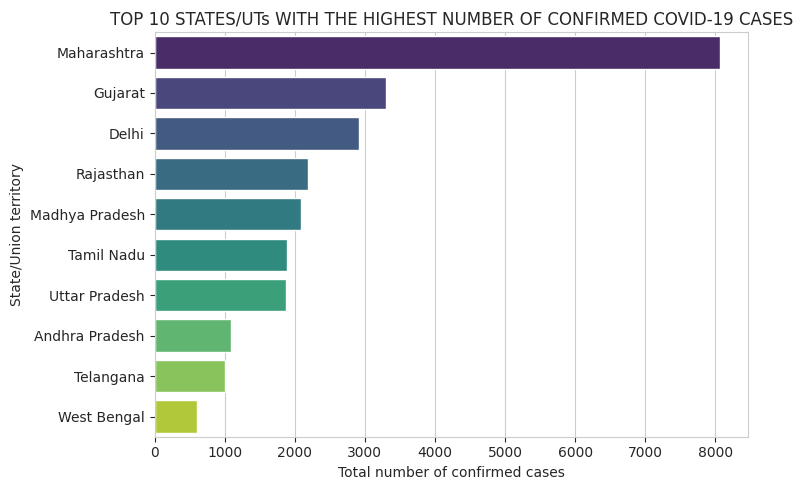

In [63]:
plt.figure(figsize=(8, 5), dpi = 100)
sns.barplot(x = states_highest.values, y = states_highest.index, palette = 'viridis')
plt.title('TOP 10 STATES/UTs WITH THE HIGHEST NUMBER OF CONFIRMED COVID-19 CASES')
plt.xlabel('Total number of confirmed cases')
plt.ylabel('State/Union territory')
plt.tight_layout()
plt.show()

B) Data table

In [64]:

print('TOP 10 STATES/UTs WITH THE HIGHEST NUMBER OF CONFIRMED COVID-19 CASES\n')
print(states_highest)

TOP 10 STATES/UTs WITH THE HIGHEST NUMBER OF CONFIRMED COVID-19 CASES

Maharashtra       8068
Gujarat           3301
Delhi             2918
Rajasthan         2185
Madhya Pradesh    2090
Tamil Nadu        1885
Uttar Pradesh     1873
Andhra Pradesh    1097
Telangana         1001
West Bengal        611
Name: detected_state, dtype: int64


11.3 States/UTs (lowest number of confirmed COVID-19 cases)


(A) Plot

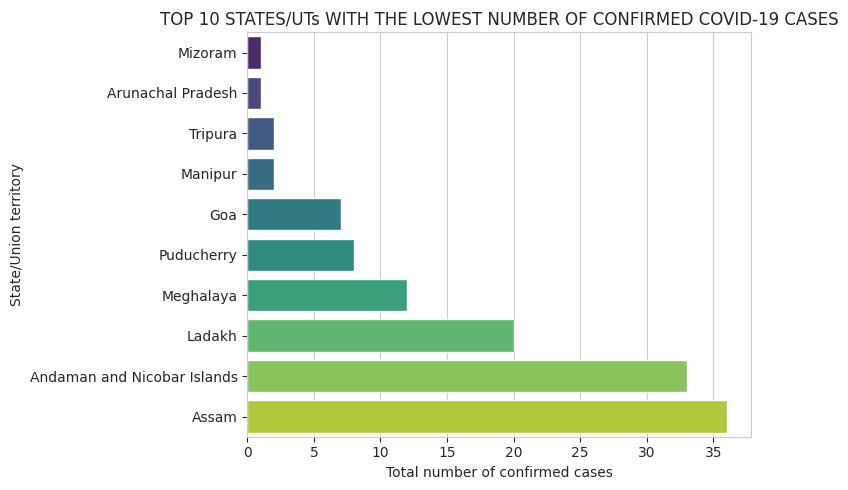

In [65]:

plt.figure(figsize=(8, 5), dpi = 100)
sns.barplot(x = states_lowest.values, y = states_lowest.index, palette = 'viridis')
plt.title('TOP 10 STATES/UTs WITH THE LOWEST NUMBER OF CONFIRMED COVID-19 CASES')
plt.xlabel('Total number of confirmed cases')
plt.ylabel('State/Union territory')
plt.tight_layout()
plt.show()

(B) Data table

In [66]:

print('TOP 10 STATES/UTs WITH THE LOWEST NUMBER OF CONFIRMED COVID-19 CASES\n')
print(states_lowest)

TOP 10 STATES/UTs WITH THE LOWEST NUMBER OF CONFIRMED COVID-19 CASES

Mizoram                         1
Arunachal Pradesh               1
Tripura                         2
Manipur                         2
Goa                             7
Puducherry                      8
Meghalaya                      12
Ladakh                         20
Andaman and Nicobar Islands    33
Assam                          36
Name: detected_state, dtype: int64


11.4 Districts (highest number of confirmed COVID-19 cases)



(A) Plot


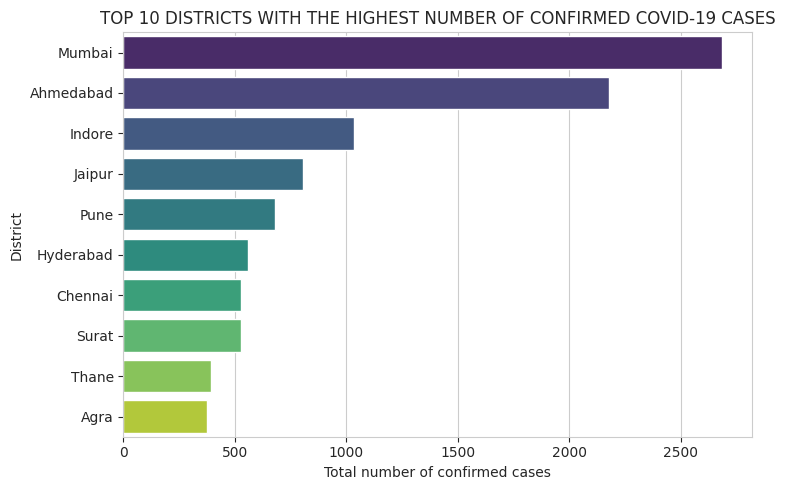

In [67]:
plt.figure(figsize=(8, 5), dpi = 100)
sns.barplot(x = districts_highest.values, y = districts_highest.index, palette = 'viridis')
plt.title('TOP 10 DISTRICTS WITH THE HIGHEST NUMBER OF CONFIRMED COVID-19 CASES')
plt.xlabel('Total number of confirmed cases')
plt.ylabel('District')
plt.tight_layout()
plt.show()

B) Data table


In [68]:

print('TOP 10 DISTRICTS WITH THE HIGHEST NUMBER OF CONFIRMED COVID-19 CASES\n')
print(districts_highest)

TOP 10 DISTRICTS WITH THE HIGHEST NUMBER OF CONFIRMED COVID-19 CASES

Mumbai       2687
Ahmedabad    2181
Indore       1036
Jaipur        808
Pune          680
Hyderabad     557
Chennai       528
Surat         526
Thane         392
Agra          374
Name: detected_district, dtype: int64


11.5 Districts (lowest number of confirmed COVID-19 cases)

In [69]:

print('DISTRICTS WITH ONLY 1 CONFIRMED COVID-19 CASE\n')
for dist, cnt in zip(individual_details['detected_district'].value_counts().index, individual_details['detected_district'].value_counts().values):
    # check if there's only 1 positive case in the district and the district name doesn't contain '*', such as 'Other Region*', 'Other States*' and 'Italians*' 
    if cnt == 1 and '*' not in dist:
        print(dist)

DISTRICTS WITH ONLY 1 CONFIRMED COVID-19 CASE

Surendranagar
Bilaspur
Alirajpur
North and Middle Andaman
Gondia
Charkhi Dadri
Dohad
Badgam
Jangoan
Barabanki
Kalimpong
Madhepura
North Tripura
Balrampur
Giridih
Kodagu
South Salmara Mankachar
Cuttack
Gonda
Lakhisarai
Kathua
Imphal West
Koderma
Parbhani
Bhadohi
Dharmapuri
Chittorgarh
Sindhudurg
Puri
Almora
Fatehabad
Shahjahanpur
East Delhi
Pauri Garhwal
Washim
Ramban
Unnao
The Dangs
Mahe
Durg
Gomati
Ferozepur
Dhenkanal
Ayodhya
North East Delhi
Tapi
Kamrup
Imphal East
Jehanabad
Lohit
Sri Muktsar Sahib
Lakhimpur
Jamnagar
Beed
Mahabubabad
Mau
Siddipet
South 24 Parganas
Morbi
Jalaun
Aizawl
Rajnandgaon
Sirmaur
Golaghat
Hooghly
Kishtwar
Hailakandi
Nanded
Rajsamand
Howrah
Pudukkottai


Important COVID-19 details of India and each of its states and union territories

In [70]:

# create a dataframe with important COVID-19 details for each Indian state/UT as well as India

# sort by total number of confirmed cases in non-ascending order
covid_19_details = statewise_data.drop(columns = ['Population', 'Density (per km2)', 'Total cases per million people']).sort_values('Confirmed', ascending = False)

# add serial number (as index) to the dataframe
covid_19_details['Sno'] = range(len(covid_19_details['State / Union Territory']))
covid_19_details.set_index('Sno', inplace = True)

print('IMPORTANT COVID-19 DETAILS OF INDIA AND EACH OF ITS STATES AND UNION TERRITORIES\n')
print(covid_19_details)

IMPORTANT COVID-19 DETAILS OF INDIA AND EACH OF ITS STATES AND UNION TERRITORIES

         State / Union Territory  Confirmed  Cured  Deaths  Active
Sno                                                               
0                          India     158410  67692    4532   86186
1                    Maharashtra      56948  17918    1897   37133
2                     Tamil Nadu      18545   9909     133    8503
3                          Delhi      15257   7264     303    7690
4                        Gujarat      15195   7549     938    6708
5                      Rajasthan       7703   4457     173    3073
6                 Madhya Pradesh       7261   3927     313    3021
7                  Uttar Pradesh       6991   3991     182    2818
8                    West Bengal       4192   1578     289    2325
9                 Andhra Pradesh       3171   2057      58    1056
10                         Bihar       3061   1083      15    1963
11                     Karnataka       2418    

#All reposts are as per available data upto that date